# Laboratorio 01 - Programación Lineal
## Ejercicio 03

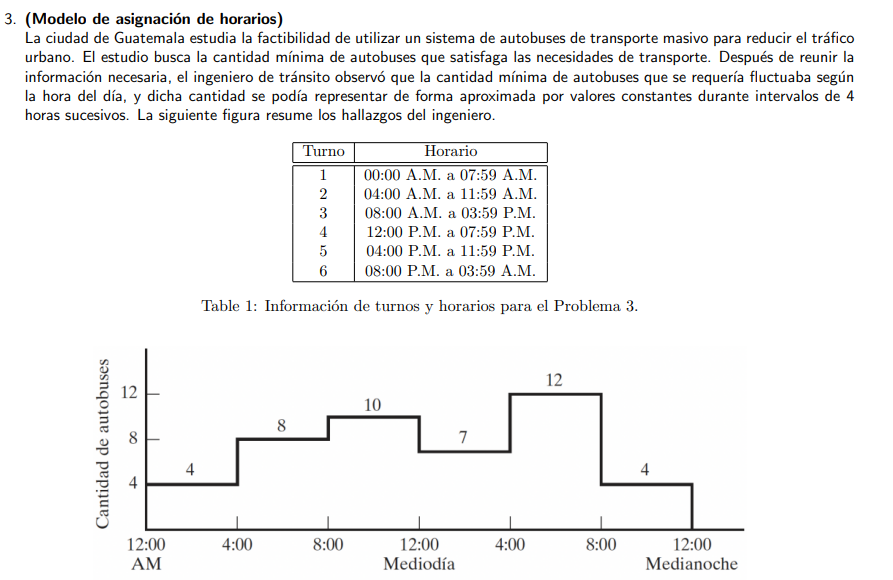
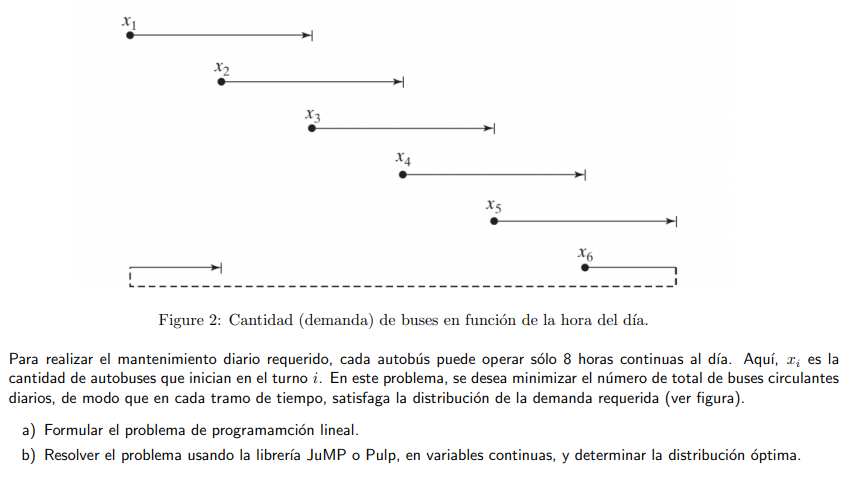

## Restriccciones


### Variables

* $x_i\ge0$: número de autobuses que inician su turno en el **turno i**, para $i=1,\dots,6$.

| Turno $i$ | Horario de inicio y fin (8 h) |      Tramos de 4 h que cubre      |
| :-------: | :---------------------------: | :-------------------------------: |
|     1     |         00:00 – 07:59         | tramo 1 (00–04) y tramo 2 (04–08) |
|     2     |         04:00 – 11:59         | tramo 2 (04–08) y tramo 3 (08–12) |
|     3     |         08:00 – 15:59         | tramo 3 (08–12) y tramo 4 (12–16) |
|     4     |         12:00 – 19:59         | tramo 4 (12–16) y tramo 5 (16–20) |
|     5     |         16:00 – 23:59         | tramo 5 (16–20) y tramo 6 (20–24) |
|     6     |         20:00 – 03:59         | tramo 6 (20–24) y tramo 1 (00–04) |

### Demandas por tramo

1. Tramo 1 (00:00–03:59): 4 buses
2. Tramo 2 (04:00–07:59): 8 buses
3. Tramo 3 (08:00–11:59): 10 buses
4. Tramo 4 (12:00–15:59): 7 buses
5. Tramo 5 (16:00–19:59): 12 buses
6. Tramo 6 (20:00–23:59): 4 buses

$$
\begin{aligned}
x_6 + x_1 &\ge 4   &\quad&\text{(tramo 1)}\\
x_1 + x_2 &\ge 8   &\quad&\text{(tramo 2)}\\
x_2 + x_3 &\ge 10  &\quad&\text{(tramo 3)}\\
x_3 + x_4 &\ge 7   &\quad&\text{(tramo 4)}\\
x_4 + x_5 &\ge 12  &\quad&\text{(tramo 5)}\\
x_5 + x_6 &\ge 4   &\quad&\text{(tramo 6)}\\
x_i &\ge 0,\quad i=1,\dots,6
\end{aligned}
$$

### Función objetivo

$$
\min\; \sum_{i=1}^6 x_i
$$

## Solución

In [ ]:
using JuMP
using HiGHS

model = Model(HiGHS.Optimizer)

In [ ]:
# Variables
@variable(model, x[1:6] >= 0)

# Demandas
d = [4, 8, 10, 7, 12, 4]


In [ ]:
# Restricciones cíclicas
for i in 1:6
    j = i == 1 ? 6 : i-1
    @constraint(model, x[j] + x[i] >= d[i])
end

# Objetivo
@objective(model, Min, sum(x))


In [ ]:
# Resolvemos con HiGHS
optimize!(model)



In [ ]:
println("Coste mínimo = ", objective_value(model))
println("x = ", value.(x))

## Discusión de resultados

Con

$$
x = [\,x_1,x_2,x_3,x_4,x_5,x_6\,] = [4,\;4,\;6,\;1,\;11,\;0],
$$

y demandas $[4,8,10,7,12,4]$, comprobamos cada tramo:

| Tramo | Demanda |     Restricción    | Cálculo       | Cumple?   |
| :---: | :-----: | :----------------: | :------------ | :-------- |
|   1   |    4    |  $x_6 + x_1 \ge 4$ | $0 + 4 = 4$   | ✔   |
|   2   |    8    |  $x_1 + x_2 \ge 8$ | $4 + 4 = 8$   | ✔   |
|   3   |    10   | $x_2 + x_3 \ge 10$ | $4 + 6 = 10$  | ✔   |
|   4   |    7    |  $x_3 + x_4 \ge 7$ | $6 + 1 = 7$   | ✔   |
|   5   |    12   | $x_4 + x_5 \ge 12$ | $1 + 11 = 12$ | ✔   |
|   6   |    4    |  $x_5 + x_6 \ge 4$ | $11 + 0 = 11$ | ✔   |




Todas las desigualdades se satisfacen; de hecho las primeras cinco son *exactamente* iguales a la demanda (binding), y la sexta queda con un “exceso” de 7 autobuses — pero **no** podemos reducir $x_5$ ni añadir $x_6$ para bajar ese exceso porque romperíamos la restricción del tramo 5 (que es crítica: $x_4+x_5\ge12$).

---

1. **Coste mínimo = 26 autobuses diarios.**

   $$
   \sum_{i=1}^6 x_i = 4 + 4 + 6 + 1 + 11 + 0 = 26.
   $$

2. **Distribución por turno de arranque**

   * **Turno 1 (00–08)**: 4 arranques
   * **Turno 2 (04–12)**: 4 arranques
   * **Turno 3 (08–16)**: 6 arranques
   * **Turno 4 (12–20)**: 1 arranque
   * **Turno 5 (16–24)**: 11 arranques
   * **Turno 6 (20–04)**: 0 arranques

3. **Por qué $x_6=0$**

   * El tramo 6 (20–24) exige sólo 4 buses, y esos 4 (en realidad 11 en total) ya los proveen los autobuses del turno 5.
   * A medianoche, el tramo 1 (00–04) se cubre justo con los 4 de turno 1. Así no se necesitan los arranques del turno 6.

4. **Slack en el tramo 6**

   * Ves que sobra capacidad en 20–24 (11 vs 4), pero es el *precio* de tener $x_5=11$ para cubrir el pico de demanda de 16–20 (que no podrías bajar sin incumplir $x_4+x_5\ge12$).

---

### Conclusión

* **Correcto y óptimo**: satisface todas las demandas con la menor suma de $x_i$.
* **Solución única**: las cinco primeras restricciones están justas (binding), así que no hay margen para redistribuir arranques sin empeorar el coste.
